Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**Assignment 8.1** | Saving Models
**Name** | Buenafe, Dhafny S.
**Section** | CPE32S3
**Date Performed**: |April 19, 2024
**Date Submitted**: |April 19, 2024
**Instructor**: | Engr. Roman Richard

<hr>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install h5py

#Pre-processing

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy
import os

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/DATASET/gender_classification_v7.csv')

- The dataset I've used is suitable for classification and pertains to gender classification. It consists of seven features: long_hair, forehead_width_cm, forehead_height_cm, nose_wide, nose_long, lips_thin, and distance_nose_to_lip_long. These features will determine the gender of the person.


In [ ]:
dataset.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
dataset.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [ ]:
dataset["gender"] = dataset["gender"].apply(lambda toLabel: 0 if toLabel == 'Male' else 1)

In [ ]:
dataset.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


In [ ]:
y = (dataset["gender"])
y

0       0
1       1
2       0
3       0
4       1
       ..
4996    1
4997    1
4998    1
4999    1
5000    0
Name: gender, Length: 5001, dtype: int64

In [ ]:
x = dataset.drop(["gender"], axis=1)
x

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


#Creating model

In [ ]:
model = Sequential()
model.add(Dense(4, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 32        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 16)                144       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 233 (932.00 Byte)
Trainable params: 233 (932.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(x, y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 96.92%


#Save and Load JSON Format

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Assignment 8.1/JSON_Model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Assignment 8.1/JSON_Model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 96.92%


#Save and Load YAML

In [ ]:
# serialize model to YAML
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Assignment 8.1/YAML_Model.h5")
print("Saved model to disk")

# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Assignment 8.1/YAML_Model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 96.92%


#Save a model in HDF5 format

In [ ]:
model.save("/content/drive/MyDrive/Assignment 8.1/Keras_Model.h5")
print("Saved model to disk")

Saved model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Checkpoint of the Neural Model Improvements

In [ ]:
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# checkpoint
filepath="/content/drive/MyDrive/Assignment 8.1/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the model
model.fit(x, y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.97093, saving model to /content/drive/MyDrive/Assignment 8.1/weights-improvement-01-0.97.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy did not improve from 0.97093

Epoch 3: val_accuracy did not improve from 0.97093

Epoch 4: val_accuracy did not improve from 0.97093

Epoch 5: val_accuracy did not improve from 0.97093

Epoch 6: val_accuracy improved from 0.97093 to 0.97274, saving model to /content/drive/MyDrive/Assignment 8.1/weights-improvement-06-0.97.hdf5

Epoch 7: val_accuracy did not improve from 0.97274

Epoch 8: val_accuracy did not improve from 0.97274

Epoch 9: val_accuracy did not improve from 0.97274

Epoch 10: val_accuracy improved from 0.97274 to 0.97335, saving model to /content/drive/MyDrive/Assignment 8.1/weights-improvement-10-0.97.hdf5

Epoch 11: val_accuracy did not improve from 0.97335

Epoch 12: val_accuracy did not improve from 0.97335

Epoch 13: val_accuracy did not improve from 0.97335

Epoch 14: val_accuracy did not improve from 0.97335

Epoch 15: val_accuracy did not improve from 0.97335

Epoch 16: val_accuracy did not improve from 0.97335

Epoch 17: val_accuracy did n

# Checkpoint Best Neural Network Model Only

In [ ]:
# checkpoint
filepath="/content/drive/MyDrive/Assignment 8.1/weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
model.fit(x, y, validation_split=0.33, epochs=100, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.97153, saving model to /content/drive/MyDrive/Assignment 8.1/weights.best.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy did not improve from 0.97153

Epoch 3: val_accuracy did not improve from 0.97153

Epoch 4: val_accuracy did not improve from 0.97153

Epoch 5: val_accuracy did not improve from 0.97153

Epoch 6: val_accuracy improved from 0.97153 to 0.97274, saving model to /content/drive/MyDrive/Assignment 8.1/weights.best.hdf5

Epoch 7: val_accuracy improved from 0.97274 to 0.97396, saving model to /content/drive/MyDrive/Assignment 8.1/weights.best.hdf5

Epoch 8: val_accuracy did not improve from 0.97396

Epoch 9: val_accuracy did not improve from 0.97396

Epoch 10: val_accuracy did not improve from 0.97396

Epoch 11: val_accuracy did not improve from 0.97396

Epoch 12: val_accuracy did not improve from 0.97396

Epoch 13: val_accuracy did not improve from 0.97396

Epoch 14: val_accuracy did not improve from 0.97396

Epoch 15: val_accuracy did not improve from 0.97396

Epoch 16: val_accuracy did not improve from 0.97396

Epoch 17: val_accuracy did not improve from 0.97396

Epoch

#Loading a Saved Neural Network Model

In [ ]:
model2= Sequential()
model2.add(Dense(4, input_dim=7, kernel_initializer = 'uniform' , activation= 'relu' ))
model2.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
model2.add(Dense(16, kernel_initializer= 'uniform' , activation= 'relu' ))
model2.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))

In [ ]:
# load weights
model2.load_weights("/content/drive/MyDrive/Assignment 8.1/weights.best.hdf5")

In [ ]:
# Compile model (required to make predictions)
model2.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
print("Created model and loaded weights from file")

Created model and loaded weights from file


In [ ]:
# estimate accuracy on whole dataset using loaded weights
scores = model2.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

accuracy: 97.00%


##Summary

#Visualize Model Training History in Keras

In [ ]:
history = model2.fit(x, y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


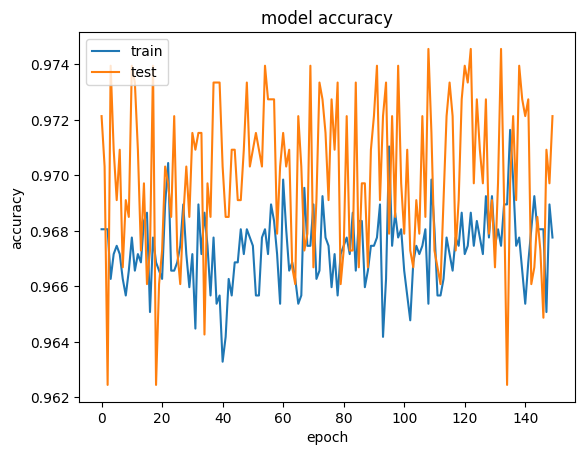

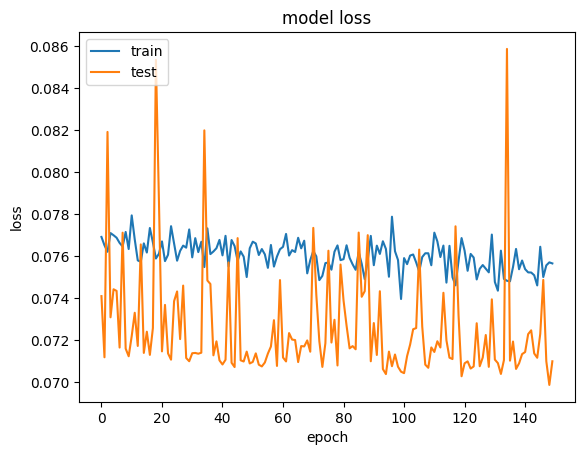

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- The model's accuracy increases as the number of epochs increases, indicating that it is still learning. However, it still needs improvement in its performance. Flactuating between 0.962 and 0.974 (Accuracy)

- The model's loss appears to be decreasing over the course of training, indicating that it is learning. However, it still needs improvement in its ability to fit the data more accurately. It fluctuates between 0.070 and 0.086 (Loss)

# Dropout Regularization

In [ ]:
!pip install scikeras

In [ ]:
import math
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
# baseline
def create_baseline():
	# create model
	model3 = Sequential()
	model3.add(Dense(32, input_shape=(7,), activation='relu'))
	model3.add(Dense(16,  activation='relu'))
	model3.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.01, momentum=0.8)
	model3.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model3

In [ ]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=10, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(pipeline, x, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Baseline: 96.84% (0.56%)


#Dropout Visible Layer

In [ ]:
def create_model():
	# create model
	model4 = Sequential()
	model4.add(Dropout(0.5, input_shape=(7,)))
	model4.add(Dense(32, activation='relu', kernel_constraint=MaxNorm(2)))
	model4.add(Dense(16, activation='relu', kernel_constraint=MaxNorm(2)))
	model4.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model4.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model4

In [ ]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=15, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(pipeline, x, y, cv=kfold)
print("Visible Layer: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: 

Visible Layer: 96.12% (0.45%)


#Dropout Hidden Layer

In [ ]:
# dropout in hidden layers with weight constraint
def create_model():
	# create model
	model5 = Sequential()
	model5.add(Dense(32, input_shape=(7,), activation='relu', kernel_constraint=MaxNorm(2)))
	model5.add(Dropout(0.5))
	model5.add(Dense(16, activation='relu', kernel_constraint=MaxNorm(2)))
	model5.add(Dropout(0.5))
	model5.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model5.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model5

In [ ]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=15, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(pipeline, x, y, cv=kfold)
print("Hidden Layer: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Hidden Layer: 96.66% (0.55%)


#Time-based learning rate schedule

In [ ]:
# create model
model6 = Sequential()
model6.add(Dense(16, input_shape=(7,), activation='relu'))
model6.add(Dense(1, activation='sigmoid'))

# Compile model
epochs = 30
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.5
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model6.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
model6.fit(x, y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


120/120 - 1s - 9ms/step - accuracy: 0.6081 - loss: 0.7166 - val_accuracy: 0.5754 - val_loss: 0.6419
Epoch 2/30
120/120 - 0s - 3ms/step - accuracy: 0.7669 - loss: 0.4796 - val_accuracy: 0.6717 - val_loss: 0.6338
Epoch 3/30
120/120 - 1s - 4ms/step - accuracy: 0.9072 - loss: 0.2386 - val_accuracy: 0.9594 - val_loss: 0.1771
Epoch 4/30
120/120 - 0s - 3ms/step - accuracy: 0.9531 - loss: 0.1456 - val_accuracy: 0.9594 - val_loss: 0.1481
Epoch 5/30
120/120 - 0s - 3ms/step - accuracy: 0.9469 - loss: 0.1510 - val_accuracy: 0.9540 - val_loss: 0.1076
Epoch 6/30
120/120 - 0s - 3ms/step - accuracy: 0.9552 - loss: 0.1238 - val_accuracy: 0.9509 - val_loss: 0.0977
Epoch 7/30
120/120 - 1s - 5ms/step - accuracy: 0.9478 - loss: 0.1291 - val_accuracy: 0.9546 - val_loss: 0.1020
Epoch 8/30
120/120 - 1s - 6ms/step - accuracy: 0.9516 - loss: 0.1291 - val_accuracy: 0.9528 - val_loss: 0.0975
Epoch 9/30
120/120 - 1s - 6ms/step - accuracy: 0.9522 - loss: 0.1128 - val_accuracy: 0.7941 - val_loss: 0.4376
Epoch 10/30


#Drop-based learning rate schedule

In [ ]:
# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 5.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [ ]:
# create model
model7 = Sequential()
model7.add(Dense(16, input_shape=(7,), activation='relu'))
model7.add(Dense(8, activation='relu'))
model7.add(Dense(1, activation='sigmoid'))

# Compile model
sgd = SGD(learning_rate=0.0, momentum=0.9)
model7.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

# Fit the model
model7.fit(x, y, validation_split=0.33, epochs=50, batch_size=28, callbacks=callbacks_list, verbose=2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 - 2s - 14ms/step - accuracy: 0.5045 - loss: 0.7038 - val_accuracy: 0.4906 - val_loss: 0.7039 - learning_rate: 0.1000
Epoch 2/50
120/120 - 0s - 4ms/step - accuracy: 0.4949 - loss: 0.6967 - val_accuracy: 0.4906 - val_loss: 0.7044 - learning_rate: 0.1000
Epoch 3/50
120/120 - 0s - 3ms/step - accuracy: 0.4896 - loss: 0.6979 - val_accuracy: 0.5094 - val_loss: 0.6930 - learning_rate: 0.1000
Epoch 4/50
120/120 - 1s - 4ms/step - accuracy: 0.4991 - loss: 0.6967 - val_accuracy: 0.5094 - val_loss: 0.6931 - learning_rate: 0.1000
Epoch 5/50
120/120 - 0s - 3ms/step - accuracy: 0.4967 - loss: 0.6942 - val_accuracy: 0.5094 - val_loss: 0.6944 - learning_rate: 0.0500
Epoch 6/50
120/120 - 1s - 5ms/step - accuracy: 0.5015 - loss: 0.6950 - val_accuracy: 0.4906 - val_loss: 0.6944 - learning_rate: 0.0500
Epoch 7/50
120/120 - 0s - 3ms/step - accuracy: 0.5212 - loss: 0.6930 - val_accuracy: 0.4906 - val_loss: 0.6986 - learning_rate: 0.0500
Epoch 8/50
120/120 - 0s - 3ms/step - accuracy: 0.4979 - loss: 0.6

####Conclusion

- In this series of tasks, I've learned how to manage and improve neural network models step by step. First, I discovered how to save models in different formats like HDF5, JSON, and YAML. This basically means keeping all the important stuff about the model, like its structure and what it's learned, in a way that's easy to understand for computers. By doing this you can see whether your model is still learning or improving so you would know how to change the accuracy in higher chances. In another activity, we didn't use callbacks, so when we trained the data it would fluctuate but here by definitely using them, the accuracy will be saved if there are changes, and if it's not changing, the last accuracy will remain. Then, I learned why it's important to save checkpoints during training. It's like saving your progress so you can pick up from where you left off if something goes wrong. Plus, I found out how to load these saved models back into the data easily. Also, in applying the dropouts, I can say that these steps can really help the model to prevent overfitting, prevent the network from memorizing the input data, and also help the data to learn in a faster way for better performance.